In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
# Load training dataset
train_df = pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set = train_df.iloc[:, 1:2].values  # Get only the 'Open' price

In [3]:
# Scale features between 0 and 1
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create time-series data: 60 timesteps → next day's price
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [4]:
# Reshape to 3D for RNN input: [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
# Build RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1896
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.2763e-04
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2289e-04
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.6446e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.8023e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.8439e-04
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.5594e-04
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.8018e-04
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.6471e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8971e-04
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4609e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6776e-04
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.7461e-04
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━

In [6]:
# Load test data
test_df = pd.read_csv('/content/Google_Stock_Price_Test.csv')
actual_prices = test_df.iloc[:, 1:2].values
total_dataset = pd.concat((train_df['Open'], test_df['Open']), axis=0)
inputs = total_dataset[len(total_dataset) - len(test_df) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Create X_test with 60 time steps
X_test = []
for i in range(60, 60 + len(test_df)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [7]:
# Predict stock prices
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


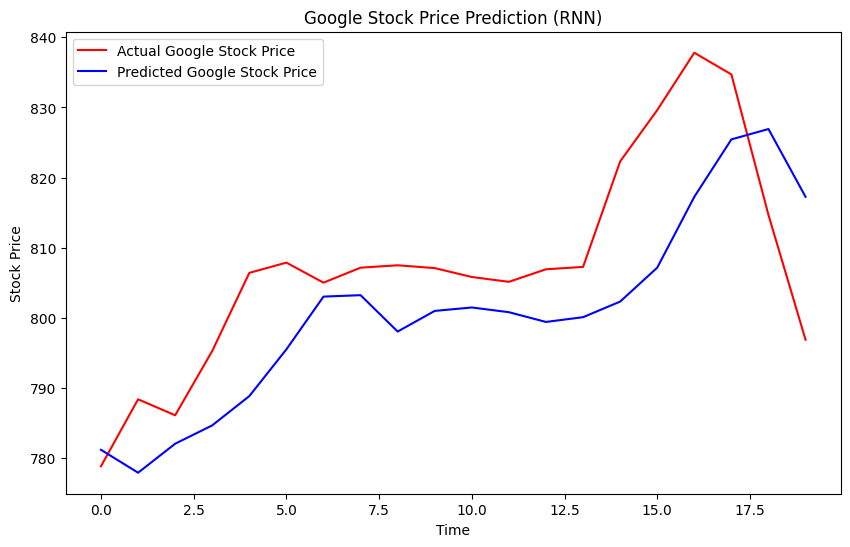

In [8]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='red', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction (RNN)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()